In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

df_netherlands = df[(df['location'] == "France")]

X = pd.to_datetime(df_netherlands['date'])
y = df_netherlands[['total_cases']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[]

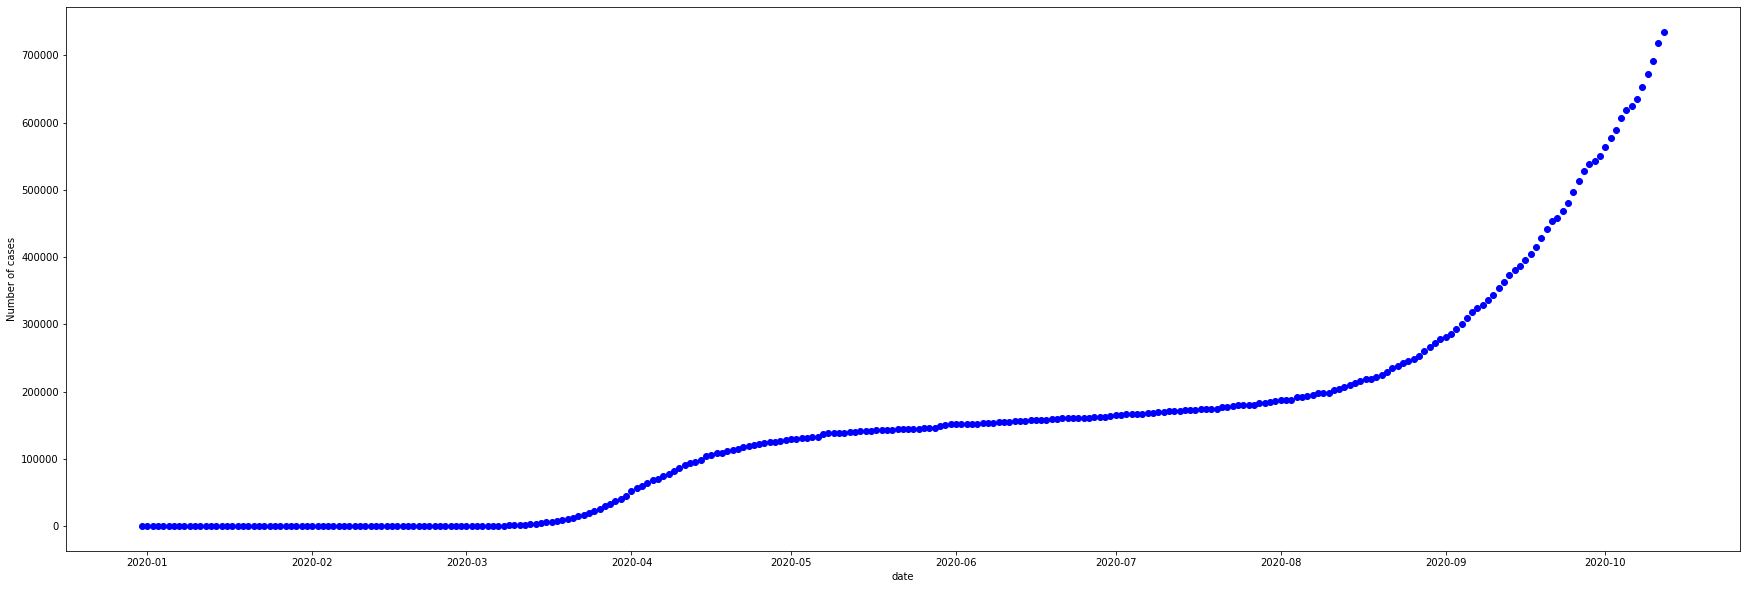

In [4]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

0.7877371225391947


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

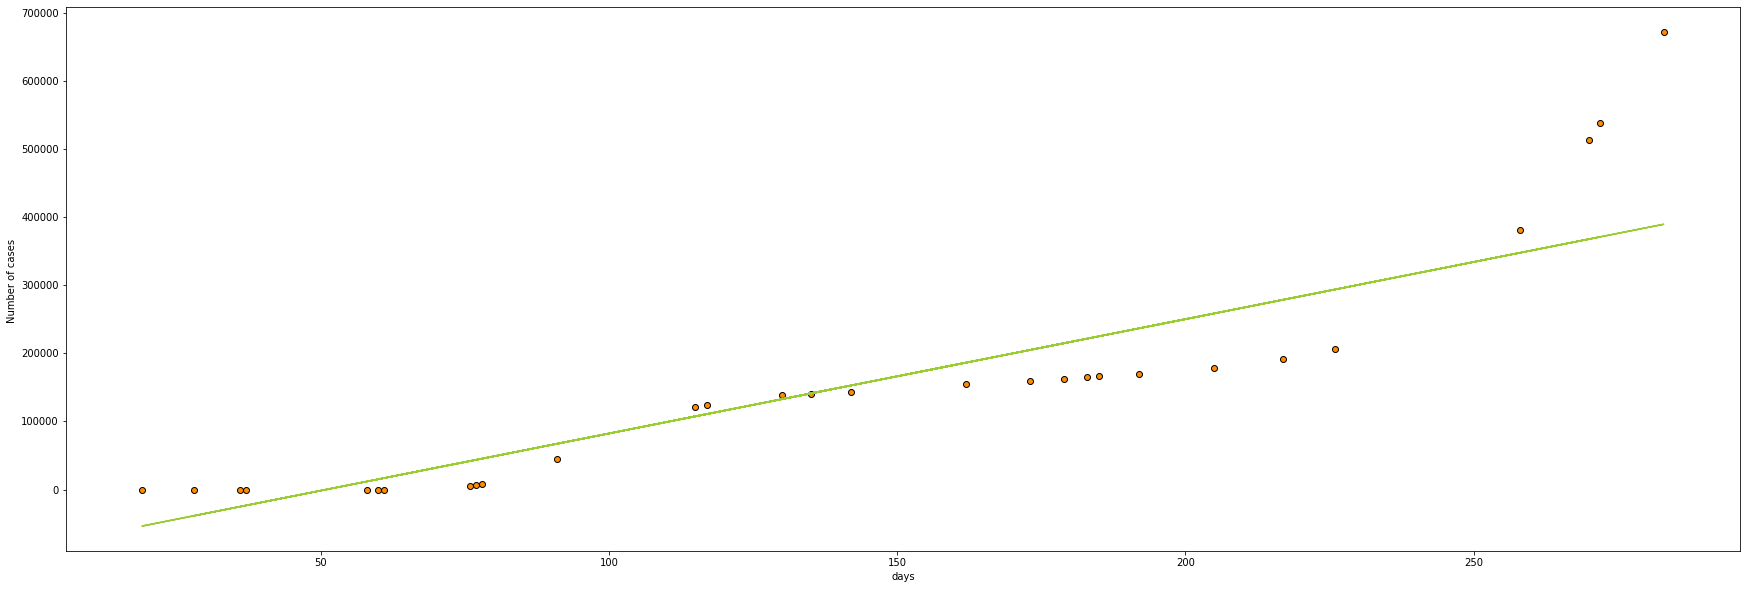

In [5]:

df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)

# this is the multiple R-squared of the prediction. This is measured how well the prediction line was predicted
# The score is quite impressive given the input data and the complex nature bahaviour of the virus. However, I think we can do better with other models  
print(accuracy_score)
# plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, predictions, color="yellowgreen")
plt.xlabel('days')
plt.ylabel('Number of cases ')
plt.plot()

0.7789170626464427


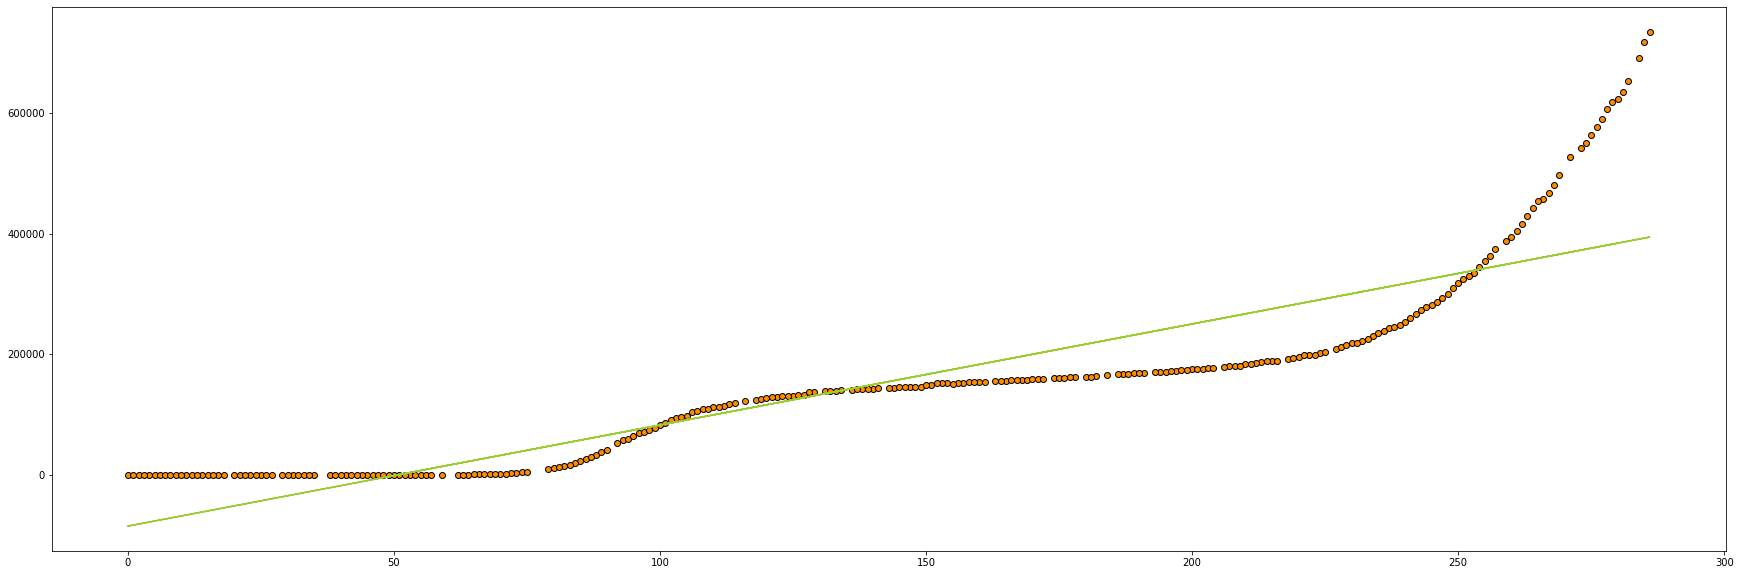

In [6]:

y_predictions = lr.predict(X_train)
accuracy_score2 = lr.score(X_train, y_train)
print(accuracy_score2)
plt.scatter(X_train, y_train, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_train, y_predictions, color="yellowgreen")



### If have time want to show tabel below more pretty

In [21]:
df = pd.DataFrame({'Actual': [y_test.to_numpy()], 'Predicted': [predictions]}).to_csv("forecast/linregress/linregress.csv")

# We need to write out all of our finding: analysis, forecasting and conclusion 